# EE-411 Fundamentals of inference and learning, EPFL 
## Exercise Session 2: optimizing functions using scipy

In this second set of exercises, we will solve the so-called *Lighthouse problem*, which serves as a perfect opportunity to introduce a very useful package for scientific computing, called **scipy**.

**What you will learn today:** In this second session, we will discuss how to use **scipy** to generate random data according to a certain distribution and to minimize 1D and 2D functions. Furthermore, we will have a first-hand application of some concepts explained in the second lecture, such as the maximal likelihood estimator, Cramér–Rao bound and Jeffreys prior.


# The Lighthouse problem 

**Locating the lighthouse**

A lighthouse is located somewhere off a piece of straight coastline at a position $\alpha$ (or $x_0$) along the shore and a distance $\beta$ (or $y_0$) out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. N flashes have so far been recorded at positions $\{x_k\}$. Where is the lighthouse?’ (from D. Sivia's book, "Data Analysis - A Bayesian Tutorial")

[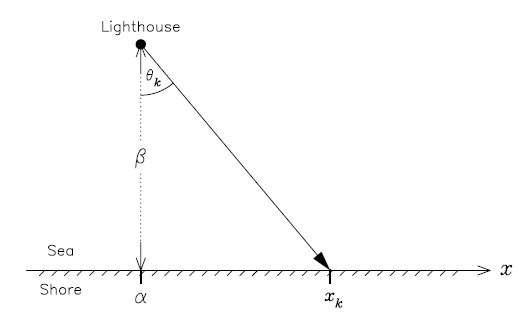](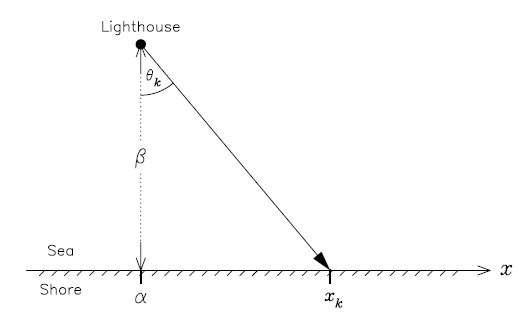)



#### 1) Compute the probability distribution $p(x | x_0,y_0)$ of observing a flash at the point $x$ along the shore depending on the distance of the lighthouse from the shore $y_0$ and its position along the shore $x_0$.

#### Recall: Maximum likelihood estimator

Assume that the data comes from a true probability distribution $x \sim P_{\lambda^{\star}}(x) = P(x|\lambda^{\star})$ for some unknown parameter $\lambda^{\star}.$
The maximum likelihood estimator gives us the parameter $\lambda$ of the distribution $P(\cdot|\lambda)$ that make the observation of a given set of data $\{x_i\}$ most likely under the prior distribution $P(x)$. Assuming that the observations are independent, and that the probability of observing $x$ is given by the probability distribution $P(x|\lambda)$
$$
\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)
$$

There are two additional quantities that will be important for our purpose. The first one is called the score
$$
S(x,\lambda)=\partial_\lambda L(x|\lambda),
$$
where we introduce the log-likelihood $L(x|\lambda)=\log P(x|\lambda)$. Importantly, the expectation of the score with respect to $P(x|\lambda)$ is zero, that is, $\mathbb{E}_{\lambda}[S(x,\lambda)]=0$. The second one is the Fisher information, which corresponds to the variance of the score with respect to the parameter $\lambda$:
$$
I(\lambda)=\mathbb{E}_{\lambda}[S(x|\lambda)^2].
$$
In case of $N$ independent events, we simply have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

##### Consider the case with $x_0=20$, $y_0=15$.

##### Let us first assume that we know the value of $x_0$ but not the one of $y_0$. 

Then, we wish to find

$$p(y_0 | \{x_k\}, x_0)$$

Using Bayes’ theorem:

$$p(y_0 | \{x_k\}, x_0) = \frac{p(y_0 , \{x_k\}, x_0)}{p(\{x_k\}, x_0)} = \frac{p(\{x_k\} | y_0, x_0)p(y_0 | x_0)p(x_0)}{p(\{x_k\} | x_0)p(x_0)}\propto p(\{x_k\} | y_0, x_0) p(y_0)$$

where the last step comes from the fact that  $y_0 \perp x_0$, and so we have $p(y_0 | x_0) = p(y_0)$.
The most intuitive prior $p(y_0)$ when we don't have additional information is the one which is uniform over a large enough segment $[y_{min}, y_{max}]$, i.e. $p(y_0) = 1/(y_{max}-y_{min})$

Even if this seems to be a good choice in general, we will show that there exist other priors that lead to a better result.
For the data likelihood $p(\{x_k\} | y_0, x_0)$ we consider that each datum $x_k$ is i.i.d., so:

$$p(\{x_k\} | y_0, x_0) = \prod_{k=1}^N p(x_k | y_0, x_0)$$

And since the prior for $y_0$ is uniform, we finally get:

$$p(y_0 | \{x_k\}, x_0) \propto \prod_{k=1}^N p(x_k | y_0, x_0)$$

Therefore, considering a uniform prior, maximizing the posterior coincides with maximizing the Log-likelihood $L(\{x_k\} | x_0,y_0)$ 

##### We now make an experiment, by generating $N=100$ samples and plotting the dependence of the log-likelihood as a function of $y_0$. 

In [2]:
import numpy as np
np.random.seed(123456) # we set the seed of the random generator

It turns out that the data generating process of the observations $\{x_k\}$ follows a Cauchy distribution with location $x_0$ and scale $y_0^\star$. To generate the set of observations $\{x_k\}$, we can use a built-in function of the `scipy` package.

In [3]:
from scipy.stats import cauchy

N=100
x0_true=20
y0_true=15

x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N) # rvs stands for Random Variates, i.e. particular outcomes of a random variable

Then, let's define the function `loglh` to compute the 
log-likelihood for a set of $N$ instances $x$, given the parameters of the Cauchy distribution $x_0$ and $y_0$.

In [4]:
def loglh(x0,y0,x):
  logl=0
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
  return logl

Finally we can compute the log-likelihood for a range of values of $y_0$ around the true value $y_0^*$ and plot its behaviour.

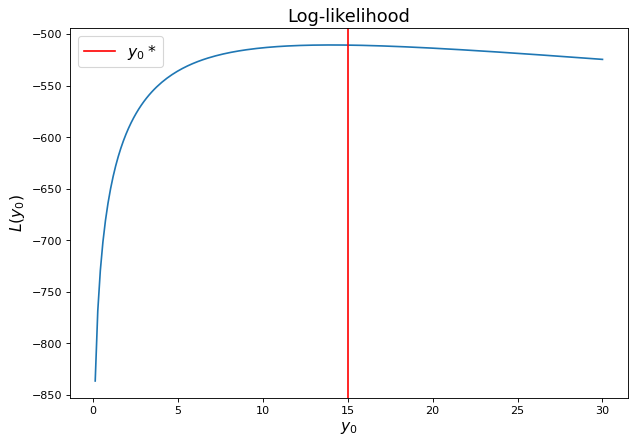

In [5]:
import matplotlib.pyplot as plt

tab_y0=np.linspace(0,30,200)[1:] # we generate a table for y0 
logl_y0=np.array([loglh(x0_true,y0,x) for y0 in tab_y0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$L(y_0)$', fontsize=14)
plt.plot(tab_y0,logl_y0)
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

We see that there’s a maximum near the true value, but it's not easy to see since we are working with logs.

However, if we compute the exponential we can get the shape of the posterior $p(y_0 | \{x_k\}, 20)$ (to get the true posterior – a distribution – we would need to find the normalizing factor, which is irrelevant here)

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\2977674641.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)


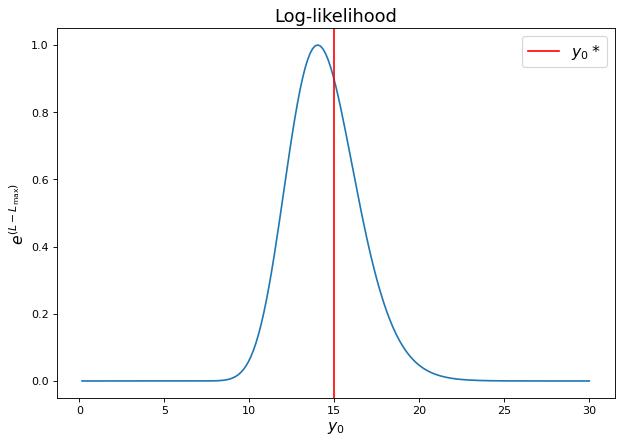

In [6]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_y0,np.exp(logl_y0-max(logl_y0)))
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

##### Now we compute the maximum likelihood estimator for $y_0$, that we call $\widehat{y}_{0,ML}$, and we see how it behaves when we vary the number of data in the sample $\{x_k\}$

A good way to compute the maximum of a function is to use a function from `scipy.optimize` called `minimize`

In [7]:
%%time
from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=10, base=10)
y0_ML=[]
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  y0_guess = np.random.uniform(0,30) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda y0:-loglh(x0_true,y0,x),y0_guess, method='Nelder-Mead')
  y0_ML.append(optimum.x)

CPU times: total: 2.03 s
Wall time: 2.07 s


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\2708132329.py:2: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{y}_{0,ML}$', fontsize=16)


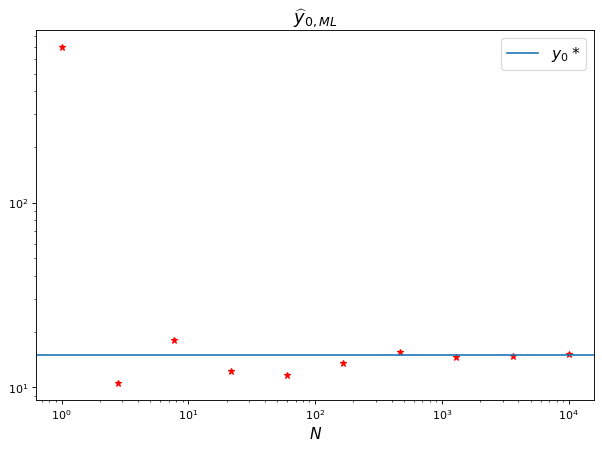

In [8]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{y}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,y0_ML,"*",color='r')
plt.axhline(y0_true, label="$y_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);

#### 2) Now do the same, but in the case in which we know $y_0 = 15$ but we do not know $x_0$, that is again $20$:
* Generate $N=100$ samples Cauchy-distributed according to the same parameters $x_0$ and $y_0$
* Plot  the Log-likelihood for a range of values of $x_0$ around the true value $x_0^*$
* Compute the maximum likelihood estimator for $x_0$ , that we call $\widehat{x}_0$ , and see how it behaves for $N\in[1,10^4]$




#### 3) Now, after having generated data for N in $[1,10^7]$, try to compute the mean $\left<x\right>$ for each sample as a function of $N$. What do you observe? What about the median?

#### MSE: which estimator is the best?

First of all, let's recall the definition:

**Mean Squared Error**: The mean square error (MSE) is the expectation
value of the square of the difference beween the estimator and the true value of parameter.

$$MSE(\widehat{\lambda};\lambda) \equiv \mathop{\mathbb{E}_{\lambda}}\big[ (\widehat{\lambda} - \lambda)^2 \big]$$

##### **FISHER INFORMATION**

As we recalled earlier, for $N$ independent events we have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

Therefore for our problem

$$
I_N(x_0, y_0) = N \mathbb{E}_x[S(x|x_0)^2] = -N \mathbb{E}_x\begin{bmatrix}\frac{\partial^2 L}{\partial x_0^2} & \frac{\partial^2 L}{\partial x_0\partial y_0}\\ \frac{\partial^2 L}{\partial y_0\partial x_0} & \frac{\partial^2 L}{\partial y_0^2}\end{bmatrix}
$$

And after a bit of computations, and a little help from [wolfram alpha](https://www.wolframalpha.com/calculators/integral-calculator/), one finds that if $x \in(-\infty,+\infty)$ then the Fisher information is

$$I_N(x_0, y_0) =\begin{bmatrix}\frac{N}{2y_0^2} & 0\\0 & \frac{N}{2y_0^2}\end{bmatrix} = \frac{N}{2y_0^2} \mathbb{I}_2$$

And therefore

*   $\det [I_N(x_0,y_0)] = \frac{N^2}{4y_0^4}$
*   $I_N(y_0|x_0) = \frac{N}{2y_0^2}$
*   $I_N(x_0|y_0) = \frac{N}{2y_0^2} = \text{const}$



##### **CRAMÉR-RAO BOUND**

For **unbiased estimators**, as for example the maximum likelihood one, the CRB tells us that for each parameter $\lambda_i$ we have

$$MSE(\widehat{\lambda_i}_{ML};\lambda_i) \geq \{[I_N(\mathbf{\lambda})]^{-1}\}_{ii}$$

where $I_N(\mathbf{\lambda})$ is the Fisher information.

##### **JEFFREYS PRIOR**

In general, the Jeffreys prior is given by

$$p(\mathbf{\lambda}) \propto \sqrt{\det[I_N(\mathbf{\lambda})]}$$

#### Consider the case in which $x_0=20$, and we know its value, and we want to estimate $y_0$

In this case the Cramér-Rao bound tells us:

$$MSE(\widehat{y_0}_{ML};y_0) \geq \frac{2y_0^2}{N}$$

While the Jeffreys prior, normalized, is $p(y_0) = \frac{1}{y_0}$ and thus the posterior 

$$p(y_0 | \{x_k\}, x_0) \propto p(\{x_k\} | y_0, x_0) p(y_0) \propto \frac{1}{y_0}\prod_{i=1}^{N}  \frac{1}{\pi} \frac{y_0}{(x_i-x_0)^2 + y_0^2}$$

Now let's compute the MSE on the likelihood estimator and on the one found with Jeffreys prior, and compare the two with the Cramér-Rao bound

Firstly, we define the function to compute the posterior with Jeffreys prior

In [9]:
def jeffpost(x0,y0,x):
  jp= - np.log(y0) #prior
  for elem in x: jp+=np.log(y0/((y0**2+(elem-x0)**2)*np.pi))
  return jp

Since we are going to use it a lot of times, we define a new function `minimizer_y0` to compute the estimators given a function to minimize  

In [10]:
def minimizer_y0(func,y0):
  y0_est=np.zeros(N_rep)
  for ir in range(N_rep):
    x=cauchy.rvs(loc=x0_true,scale=y0,size=N)
    y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
  return y0_est;

To estimate the $MSE$, i.e. to compute the expected value over $\widehat{\lambda}$, we need to repeat the estimation $N_{rep}$ times. We will do this for $N_{est} = 15$ values of $y_0$ in $(0,1]$, starting with $N=10$ and $N_{rep} = 500$

In [11]:
N_est=15
tab_y0=np.linspace(0,1,N_est+1)[1:]
N = 10
N_rep = 500

In [12]:
%%time

y0_ML= np.array([ minimizer_y0(loglh,y0) for y0 in tab_y0])
y0_J= np.array([ minimizer_y0(jeffpost,y0) for y0 in tab_y0])

C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\994780984.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\635590535.py:3: RuntimeWarning: divide by zero encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\1296118045.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(y0) #prior
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\1296118045.py:2: RuntimeWarning: divide by zero encountered in log


CPU times: total: 53.8 s
Wall time: 58.4 s


Now that we have computed $N_{rep}$ estimates for each value of $y_0$ with both methods, we can estimate the $MSE$ and we can use **bootstrap** to give a confidence interval on our estimations

First we define the function `MSE_est`
that, given the array of $N_{rep}$ estimates of $y_0$, returns the estimate of the $MSE$ and its C.I.

In [13]:
from numpy import percentile
from numpy.random import choice

def MSE_est(y0_est,y0):
  N_boot=100
  MSE = (y0_est - np.full(N_rep, y0))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

And now we can compute our estimates for each $y_0$

In [14]:
MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J[j], y0)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

And compare them to the Cramér-Rao lower bound

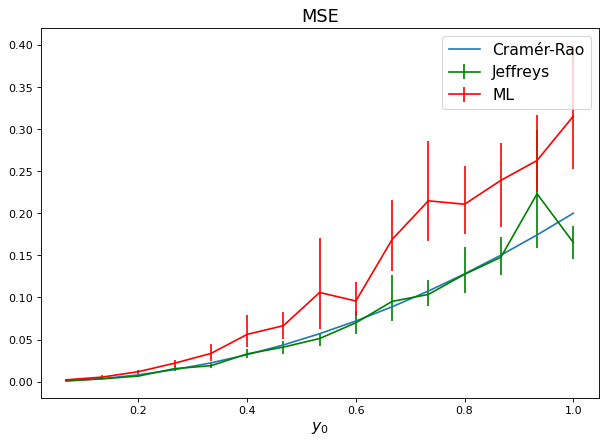

In [15]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_y0,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffreys')
plt.errorbar(tab_y0,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_y0, 2*tab_y0*tab_y0/N, label='Cramér-Rao')
plt.legend(fontsize=14)

#### 4) Now do the same for $N=3$ and $N=50$ and plot all in a single graph, to see what happens when we vary $N$.

#### 5) Now consider the case in which we know the value of $y_0=15$ but not $x_0$:

* What does Jeffreys prior tell us in this case?
* Compare the MSE on the maximum likelihood and the median estimators for values of $x_0$ in $[-1,1]$ and compare both to the Cramér-Rao bound.
* Repeat the process for $N=3,50$ as before and compare the results.

## Estimate both the parameters
Now we consider again the case with $y_0=15$, $x_0=20$, but let's assume that we do not know either $x_0$, $y_0$. 

If we assume that both $x_0$ and $y_0$ are uniform over some interval, then the posterior is simply proportional to the likelihood:
$$p(x_0, y_0 | \{x_k\}) \propto p(\{x_k\} | x_0, y_0)$$

We make an experiment, by generating $N=100$ samples and we plot the dependence of log-likelihood as a function of $x_0$ and $y_0$. 

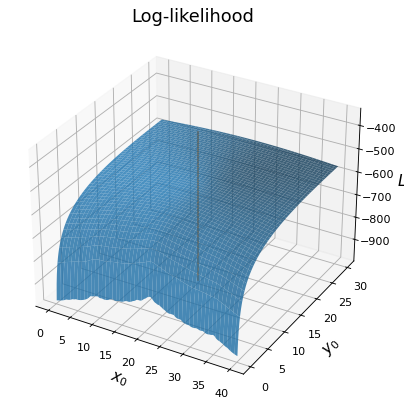

In [16]:
from mpl_toolkits.mplot3d import Axes3D
x0_true=20
y0_true=15
N=100
tab_y0=np.linspace(0,30,201)[1:]
tab_x0=np.linspace(0,40,200)
x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N)
#logl=[[loglh(x0,y,x) for y in taby0] for x0 in tabx0]

fig = plt.figure(figsize=(9,6), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zs = np.array(loglh(np.ravel(X), np.ravel(Y),x))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(max(zs)+200, min(zs), 1000))

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)

plt.show()


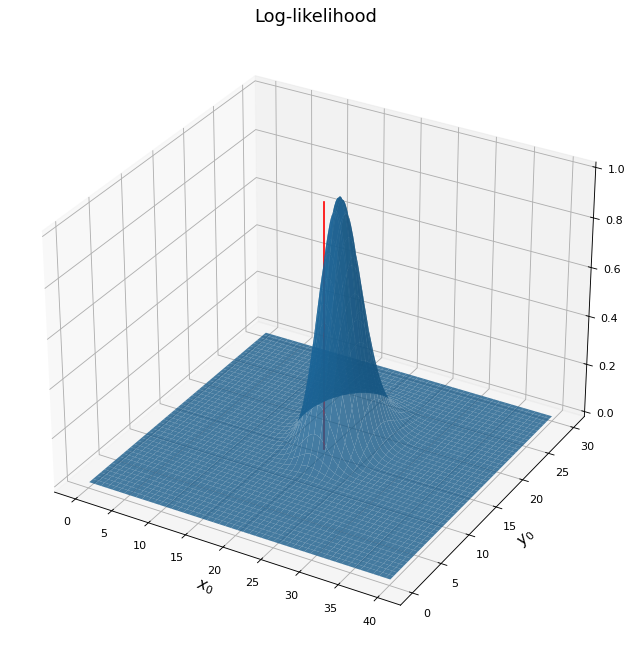

In [17]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zslog = np.array(np.exp(loglh(np.ravel(X), np.ravel(Y),x) - max(zs)))
Z = zslog.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(0,1, 1000),color='r')

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)


plt.show()


##### And finally we compute the ML estimator of both the parameters

In [18]:
%%time
tab_N= np.logspace(0, 4, base=10, num=20)
y0_ML=[]
x0_ML=[]

def f(params):
  x0,y0 = params
  return -loglh(x0,y0,x)

for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  xy0 = (np.random.uniform(0,40),np.random.uniform(0,30))
  #bounds = [(-40,40),(0,50)]
  optimum = minimize(f,xy0, method='Nelder-Mead')
  x0_ML.append(optimum.x[0])
  y0_ML.append(optimum.x[1])

C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)


CPU times: total: 2.62 s
Wall time: 2.65 s


20 20 20


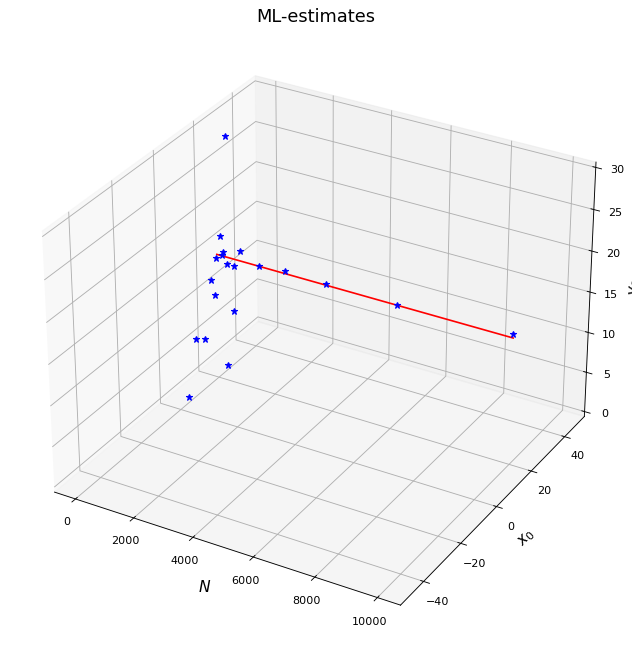

In [19]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sizes = np.array([int(N) for N in tab_N])
print(len(sizes),len(x0_ML), len(y0_ML))
plt.title('ML-estimates', fontsize=16)
ax.plot( range(10000), np.full(10000, x0_true), np.full(10000, y0_true),color='r')
ax.plot(tab_N, x0_ML, y0_ML, marker="*",color='b', ls='None')
ax.set_xlabel('$N$', fontsize=14)
ax.set_ylabel('$x_0$', fontsize=14)
ax.set_zlabel('$y_0$', fontsize=14)

ax.set_ylim(-50,50)
ax.set_zlim(0,30)

plt.show()

## Evaluated!

#### 6) Take the dataset you find in `where_is_the_light.npy` file and import it into a numpy array. It contains $N=10000$ Cauchy-distributed samples with unknown parameters $x_0$ and $y_0$. Using the techniques previously showed, give an estimate (with a confidence interval) of the true value of $x_0$ and $y_0$. You are guaranteed that $x_0 \in [-100,100]$ and $y_0 \in [0,30]$. *Bonus*: which one is better between Jeffreys prior and uniform prior?

In [39]:
np.random.seed(42)


X0_MIN, X0_MAX = -100.0, 100.0
Y0_MIN, Y0_MAX = 0.0, 30.0  

# Load data
x = np.load("where_is_the_light.npy")  

# N should be 10000
N = x.size
print(f"N = {N}")

N = 10000


In [42]:
def _in_domain(x0, y0):
    return (X0_MIN <= x0 <= X0_MAX) and (0.0 < y0 <= Y0_MAX)

def loglik(x0, y0, data):
    """
    Cauchy log-likelihood:
      sum_k log( y0 / (pi * [ (x_k - x0)^2 + y0^2 ]) )
    """
    if not _in_domain(x0, y0):
        return -np.inf
    denom = np.pi * ((data - x0)**2 + y0**2)
    return np.sum(np.log(y0 / denom))

def neg_loglik(theta, data):
    """
    Negative log-likelihood (ML objective).
    """
    x0, y0 = float(theta[0]), float(theta[1])
    if not _in_domain(x0, y0):
        return np.inf
    return -loglik(x0, y0, data)

def neg_logpost_jeffreys(theta, data):
    """
    Negative log-posterior under Jeffreys prior:
      log posterior ∝ loglik(x0, y0 | data) − log(y0)
    """
    x0, y0 = float(theta[0]), float(theta[1])
    if not _in_domain(x0, y0):
        return np.inf
    return -(loglik(x0, y0, data) - np.log(y0))

In [44]:

def median_abs_deviation(v):
    med = np.median(v)
    return np.median(np.abs(v - med))

x0_init = np.median(x)
y0_init = median_abs_deviation(x)

theta0 = np.array([float(x0_init), float(y0_init)], dtype=float)

print(f"x0_init (median) = {x0_init:.6g}")
print(f"y0_init (MAD)    = {y0_init:.6g}")
print("theta0 =", theta0)


x0_init (median) = 42.7717
y0_init (MAD)    = 15.7385
theta0 = [42.77166908 15.73846386]


In [45]:
ml_res = minimize(
    fun=lambda th: neg_loglik(th, x),
    x0=theta0,
    method="Nelder-Mead",
    options=dict(maxiter=20000, fatol=1e-9, xatol=1e-9, disp=False)
)

if not ml_res.success:
    print("Warning: ML optimizer did not report success:", ml_res.message)

x0_ml, y0_ml = float(ml_res.x[0]), float(ml_res.x[1])
negll_ml = float(ml_res.fun)

print(f"ML estimate:")
print(f"  x0_ml = {x0_ml:.6g}")
print(f"  y0_ml = {y0_ml:.6g}")
print(f"  -log L at optimum = {negll_ml:.6g}")

ML estimate:
  x0_ml = 42.8501
  y0_ml = 15.7462
  -log L at optimum = 52754.6


In [46]:
map_res = minimize(
    fun=lambda th: neg_logpost_jeffreys(th, x),
    x0=theta0,
    method="Nelder-Mead",
    options=dict(maxiter=20000, fatol=1e-9, xatol=1e-9, disp=False)
)

if not map_res.success:
    print("Warning: MAP optimizer did not report success:", map_res.message)

x0_map, y0_map = float(map_res.x[0]), float(map_res.x[1])
neglogpost_map = float(map_res.fun)

print(f"MAP (Jeffreys) estimate:")
print(f"  x0_map = {x0_map:.6g}")
print(f"  y0_map = {y0_map:.6g}")
print(f"  -log posterior at optimum = {neglogpost_map:.6g}")

MAP (Jeffreys) estimate:
  x0_map = 42.8501
  y0_map = 15.743
  -log posterior at optimum = 52757.3


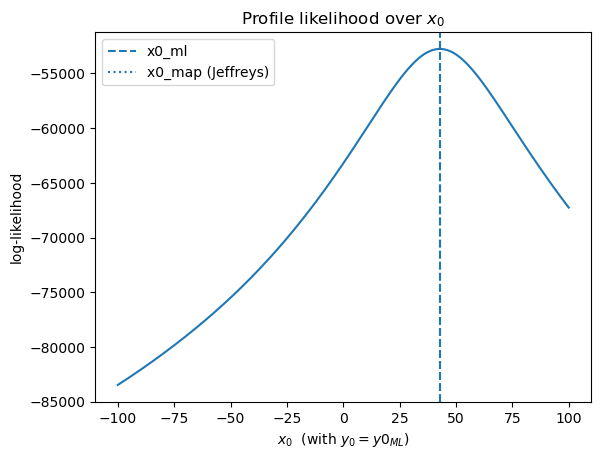

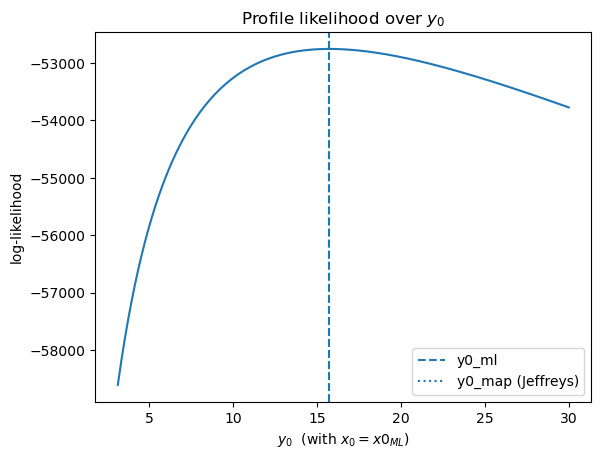

In [51]:
x0_prof_grid = _bounded_linspace(x0_ml - dx, x0_ml + dx, 400, X0_MIN, X0_MAX)
Lx = np.array([loglik(xv, y0_ml, x) for xv in x0_prof_grid])

plt.figure()
plt.plot(x0_prof_grid, Lx)
plt.axvline(x0_ml,  linestyle="--", label="x0_ml")
plt.axvline(x0_map, linestyle=":",  label="x0_map (Jeffreys)")
plt.xlabel("$x_0$  (with $y_0 = y0_{ML}$)")
plt.ylabel("log-likelihood")
plt.title("Profile likelihood over $x_0$")
plt.legend()
plt.show()

# Profile over y0 (x0 fixed)
y0_prof_grid = np.linspace(ymin, ymax, 400)
Ly = np.array([loglik(x0_ml, yv, x) for yv in y0_prof_grid])

plt.figure()
plt.plot(y0_prof_grid, Ly)
plt.axvline(y0_ml,  linestyle="--", label="y0_ml")
plt.axvline(y0_map, linestyle=":",  label="y0_map (Jeffreys)")
plt.xlabel("$y_0$  (with $x_0 = x0_{ML}$)")
plt.ylabel("log-likelihood")
plt.title("Profile likelihood over $y_0$")
plt.legend()
plt.show()

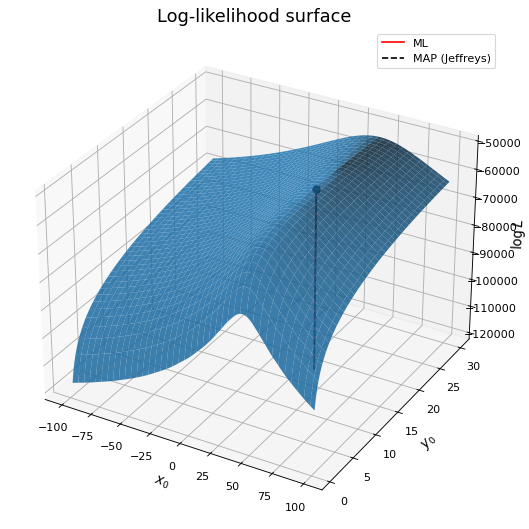

In [52]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)
import matplotlib.pyplot as plt
import numpy as np

# Grid over the full allowed domain (matching the prof's ranges)
x0_vals = np.linspace(X0_MIN, X0_MAX, 120)     # e.g., -100 to 100
y0_vals = np.linspace(0.5, Y0_MAX, 120)        # avoid 0 to keep log defined; e.g., 0.5 to 30

X, Y = np.meshgrid(x0_vals, y0_vals)

# Evaluate log-likelihood on the grid (same formula as before)
Z = np.array([loglik(x0, y0, x) for x0, y0 in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

# Make the 3D surface plot
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.85)

# Mark ML and MAP points; add a vertical "path" line like the example
zmax, zmin = np.nanmax(Z), np.nanmin(Z)
ax.plot([x0_ml, x0_ml], [y0_ml, y0_ml], [zmax, zmin], color='r', label='ML')
ax.scatter([x0_ml], [y0_ml], [loglik(x0_ml, y0_ml, x)], color='r', s=40)

ax.plot([x0_map, x0_map], [y0_map, y0_map], [zmax, zmin], color='k', linestyle='--', label='MAP (Jeffreys)')
ax.scatter([x0_map], [y0_map], [loglik(x0_map, y0_map, x)], color='k', s=40)

plt.title('Log-likelihood surface', fontsize=16)
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$y_0$', fontsize=12)
ax.set_zlabel('$\\log L$', fontsize=12)
ax.legend(loc='best')
plt.show()

In [48]:
def estimate_ml(data, theta_start):
    res = minimize(
        fun=lambda th: neg_loglik(th, data),
        x0=theta_start,
        method="Nelder-Mead",
        options=dict(maxiter=20000, fatol=1e-9, xatol=1e-9, disp=False)
    )
    if (not res.success):
        return np.nan, np.nan
    x0_hat, y0_hat = float(res.x[0]), float(res.x[1])
    # final domain check
    if not _in_domain(x0_hat, y0_hat):
        return np.nan, np.nan
    return x0_hat, y0_hat

def estimate_map_jeffreys(data, theta_start):
    res = minimize(
        fun=lambda th: neg_logpost_jeffreys(th, data),
        x0=theta_start,
        method="Nelder-Mead",
        options=dict(maxiter=20000, fatol=1e-9, xatol=1e-9, disp=False)
    )
    if (not res.success):
        return np.nan, np.nan
    x0_hat, y0_hat = float(res.x[0]), float(res.x[1])
    if not _in_domain(x0_hat, y0_hat):
        return np.nan, np.nan
    return x0_hat, y0_hat

# Bootstrap settings (use the same order of magnitude as earlier parts)
B = 500
rng = np.random.default_rng(12345)  # independent RNG for bootstrap

x0_ml_bs = np.empty(B); y0_ml_bs = np.empty(B)
x0_map_bs = np.empty(B); y0_map_bs = np.empty(B)

for b in range(B):
    xb = x[rng.integers(0, N, size=N)]  # resample with replacement
    # For stability under heavy tails, restart from the same theta0 each time (same as earlier style)
    th0 = theta0
    x0b_ml, y0b_ml = estimate_ml(xb, th0)
    x0b_map, y0b_map = estimate_map_jeffreys(xb, th0)
    x0_ml_bs[b], y0_ml_bs[b]   = x0b_ml,  y0b_ml
    x0_map_bs[b], y0_map_bs[b] = x0b_map, y0b_map
    # Optional light progress
    if (b+1) % 100 == 0:
        print(f"bootstrap {b+1}/{B}")

# Drop NaNs (if any bootstrap runs failed)
def _clean(arr): 
    return arr[~np.isnan(arr)]

x0_ml_bs_c   = _clean(x0_ml_bs)
y0_ml_bs_c   = _clean(y0_ml_bs)
x0_map_bs_c  = _clean(x0_map_bs)
y0_map_bs_c  = _clean(y0_map_bs)

def pct_ci(arr, alpha=0.05):
    lo = 100.0 * (alpha/2.0)
    hi = 100.0 * (1.0 - alpha/2.0)
    return np.percentile(arr, [lo, hi])

ci_x0_ml  = pct_ci(x0_ml_bs_c)
ci_y0_ml  = pct_ci(y0_ml_bs_c)
ci_x0_map = pct_ci(x0_map_bs_c)
ci_y0_map = pct_ci(y0_map_bs_c)

print("\nBootstrap 95% Confidence Intervals (percentile)")
print("ML (uniform prior):")
print(f"  x0_ml = {x0_ml:.6g}  CI95 = [{ci_x0_ml[0]:.6g}, {ci_x0_ml[1]:.6g}]  (n={x0_ml_bs_c.size}/{B})")
print(f"  y0_ml = {y0_ml:.6g}  CI95 = [{ci_y0_ml[0]:.6g}, {ci_y0_ml[1]:.6g}]  (n={y0_ml_bs_c.size}/{B})")

print("\nMAP (Jeffreys prior on scale):")
print(f"  x0_map = {x0_map:.6g}  CI95 = [{ci_x0_map[0]:.6g}, {ci_x0_map[1]:.6g}]  (n={x0_map_bs_c.size}/{B})")
print(f"  y0_map = {y0_map:.6g}  CI95 = [{ci_y0_map[0]:.6g}, {ci_y0_map[1]:.6g}]  (n={y0_map_bs_c.size}/{B})")


bootstrap 100/500
bootstrap 200/500
bootstrap 300/500
bootstrap 400/500
bootstrap 500/500

Bootstrap 95% Confidence Intervals (percentile)
ML (uniform prior):
  x0_ml = 42.8501  CI95 = [42.4314, 43.2979]  (n=500/500)
  y0_ml = 15.7462  CI95 = [15.3206, 16.1237]  (n=500/500)

MAP (Jeffreys prior on scale):
  x0_map = 42.8501  CI95 = [42.4314, 43.298]  (n=500/500)
  y0_map = 15.743  CI95 = [15.3176, 16.1205]  (n=500/500)


In [ ]:
import pandas as pd
from IPython.display import display, Markdown

def _ci_tuple(ci):
    return float(ci[0]), float(ci[1])

# Build a tidy table with separate CI columns
rows = [
    ("ML (uniform)",   "x0", float(x0_ml),  *_ci_tuple(ci_x0_ml)),
    ("ML (uniform)",   "y0", float(y0_ml),  *_ci_tuple(ci_y0_ml)),
    ("MAP (Jeffreys)", "x0", float(x0_map), *_ci_tuple(ci_x0_map)),
    ("MAP (Jeffreys)", "y0", float(y0_map), *_ci_tuple(ci_y0_map)),
]
res_df = pd.DataFrame(rows, columns=["Method", "Parameter", "Estimate", "CI95 lower", "CI95 upper"])

# Order rows: ML then MAP, x0 then y0
res_df = res_df.set_index(["Method", "Parameter"]).loc[
    [("ML (uniform)", "x0"), ("ML (uniform)", "y0"),
     ("MAP (Jeffreys)", "x0"), ("MAP (Jeffreys)", "y0")]
].reset_index()

# Display with pandas Styler (no index, rounded values)
styled = (res_df.style
          .hide(axis="index")
          .format({"Estimate": "{:.6g}", "CI95 lower": "{:.6g}", "CI95 upper": "{:.6g}"})
          .set_table_styles([
              {"selector": "th", "props": [("text-align", "center")]},
              {"selector": "td", "props": [("padding", "6px 10px")]},
              {"selector": "table", "props": [("border-collapse", "collapse"),
                                              ("border", "1px solid #ddd")]}
          ])
          .set_properties(**{"text-align": "center"})
         )

display(Markdown("### Estimates and 95% CIs"))
display(styled)

# CI width comparison
w_x0_ml  = ci_x0_ml[1]  - ci_x0_ml[0]
w_y0_ml  = ci_y0_ml[1]  - ci_y0_ml[0]
w_x0_map = ci_x0_map[1] - ci_x0_map[0]
w_y0_map = ci_y0_map[1] - ci_y0_map[0]

comp = pd.DataFrame(
    [("x0", w_x0_ml, w_x0_map),
     ("y0", w_y0_ml, w_y0_map)],
    columns=["Parameter", "CI width ML", "CI width MAP (Jeffreys)"]
)
comp_styled = (comp.style.hide(axis="index")
               .format({"CI width ML": "{:.6g}", "CI width MAP (Jeffreys)": "{:.6g}"})
               .set_properties(**{"text-align": "center"}))

display(Markdown("### CI width comparison (smaller = tighter)"))
display(comp_styled)


msg = []
if w_y0_map < w_y0_ml: msg.append("Jeffreys gives a tighter CI for **y₀**.")
if w_x0_map < w_x0_ml: msg.append("Jeffreys also tightens **x₀**.")
if not msg: msg.append("Both methods yield comparable CI widths.")
display(Markdown("**Conclusion:** " + " ".join(msg)))


### Estimates and 95% CIs

Method,Parameter,Estimate,CI95 lower,CI95 upper
ML (uniform),x0,42.8501,42.4314,43.2979
ML (uniform),y0,15.7462,15.3206,16.1237
MAP (Jeffreys),x0,42.8501,42.4314,43.298
MAP (Jeffreys),y0,15.743,15.3176,16.1205


### CI width comparison (smaller = tighter)

Parameter,CI width ML,CI width MAP (Jeffreys)
x0,0.866511,0.866535
y0,0.803086,0.802898


**Conclusion:** Jeffreys gives a tighter CI for **y₀** (scale).